In [50]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re


# import file
movie_list = pd.read_csv('data/movie_list.csv')

# drop nulls
movie_list_real = movie_list.dropna()


# filter for person 1 picks
collin_picks = movie_list_real[movie_list_real["Chosen By"]=='Collin']


# count of person 1 picks
count_of_collin_picks = collin_picks.count()

print("Movies Collin has selected:", count_of_collin_picks)



Movies Collin has selected: Name                  40
Status                40
Completed             40
Collin Rating         40
Valerie Rating        40
Genre                 40
Source                40
Previously Seen By    40
Chosen By             40
imdb                  40
Release Date          40
dtype: int64


In [52]:

#mean watched decade

def get_year(date_str: str) -> str:
    return int(str(date_str)[-4:])  # Take the last 4 characters of each date string

# Apply the function to the "Release Date" column
movie_list_real["Release Year"] = movie_list_real["Release Date"].apply(get_year)

# Convert the 'Release Year' column to a single string
rd = movie_list_real["Release Year"].to_string()

# Remove last N characters from the single concatenated string
N = 4
Str2 = rd[-N:]

# Print results
# print("Concatenated Release Dates as String:", rd)
# print("Last 4 characters:", Str2)

#convert str to int for decade floor category 
def get_int(Str2: int) -> int:
        return int(Str2)

md= movie_list_real["Release Year"]

# create decade floor
decade_floor = np.floor(md / 10).astype(int)
movie_list_real["Decades"] = decade_floor * 10

# mean watched decade
mean_watched_decade = movie_list_real.groupby("Decades")["Release Year"].mean()
max_decade = mean_watched_decade.idxmax()  # Corrected to find the index (decade) of the max value

print("The mean decade is" , mean_watched_decade)


The mean decade is Decades
1970    1976.000000
1980    1984.166667
1990    1995.500000
2000    2004.500000
2010    2014.071429
2020    2022.458333
Name: Release Year, dtype: float64


C:\Users\19564\AppData\Local\Temp\ipykernel_19116\350215066.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_list_real["Release Year"] = movie_list_real["Release Date"].apply(get_year)
C:\Users\19564\AppData\Local\Temp\ipykernel_19116\350215066.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_list_real["Decades"] = decade_floor * 10


In [53]:
# decade breakdown 

# max decade
print("The max decade is",  max_decade)

oldest = movie_list_real["Release Year"].min()
recent = movie_list_real["Release Year"].max()

# oldest_movie
print("the most recent movie is from",recent )
print("the oldest movie is from", oldest)

# time spread
time_diff =  recent-oldest
print("The spread of time in years is", time_diff)

# person 1 most watched decade TODO

The max decade is 2020
the most recent movie is from 2024
the oldest movie is from 1976
The spread of time in years is 48


Decades
2000    32
2010    28
2020    24
1990    10
1980     6
1970     1
Name: count, dtype: int64

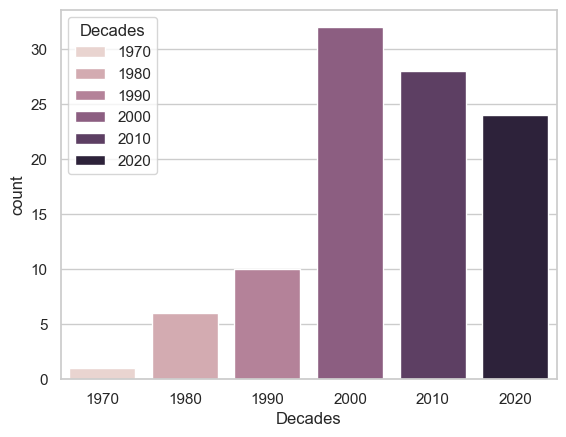

In [54]:
#  plot of decades watched

sns.countplot(x= movie_list_real["Decades"], hue = movie_list_real["Decades"])

movie_list_real["Decades"].value_counts()

In [65]:
#SUMMARY STATS COLLIN
#  person 1's highest rating
c_rating = movie_list_real["Collin Rating"]
c_max= max(c_rating)


#person #1's lowest rating
c_min = min(c_rating)

#person #1's avg rating, rounded 2 decimals
c_avg= c_rating.mean().round(2)
c_avg

#person 1's stdv of ratings
c_stdv= c_rating.std()

print("Collin's highest rating is", c_max)
print("Collin's lowest rating is", c_min)
print("Collin's average rating is", c_avg)
print("Collin's standard deviation is", c_stdv)

Collin's highest rating is 9.0
Collin's lowest rating is 3.0
Collin's average rating is 6.86
Collin's standard deviation is 1.332514187318822


C:\Users\19564\AppData\Local\Temp\ipykernel_19116\3768435069.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels = list , rotation=45)


[Text(0, 0, 'Peacock'),
 Text(1, 0, 'Netflix'),
 Text(2, 0, 'Max'),
 Text(3, 0, 'Paramount+'),
 Text(4, 0, 'Hulu'),
 Text(5, 0, 'Disney +'),
 Text(6, 0, 'Theater'),
 Text(7, 0, 'To Torrent'),
 Text(8, 0, 'Youtube'),
 Text(9, 0, 'Prime Video'),
 Text(10, 0, 'Bluray'),
 Text(11, 0, 'Torrent')]

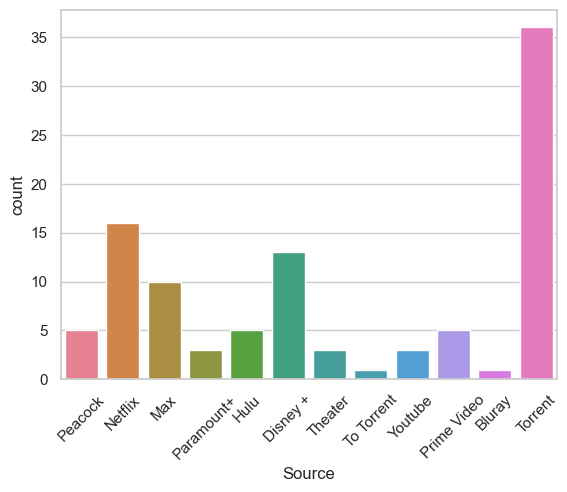

In [56]:
# # Count Plot of Movie Sources 
m= movie_list_real["Source"].value_counts()
m

movie_sources = (movie_list_real["Source"])
list = []

for val in movie_sources:
    if val not in list:
        list.append(val)

g= sns.countplot(data=movie_list_real, x = movie_list_real["Source"], hue = movie_list_real["Source"])
g.set_xticklabels(labels = list , rotation=45) 

<Axes: xlabel='Count', ylabel='Chosen By'>

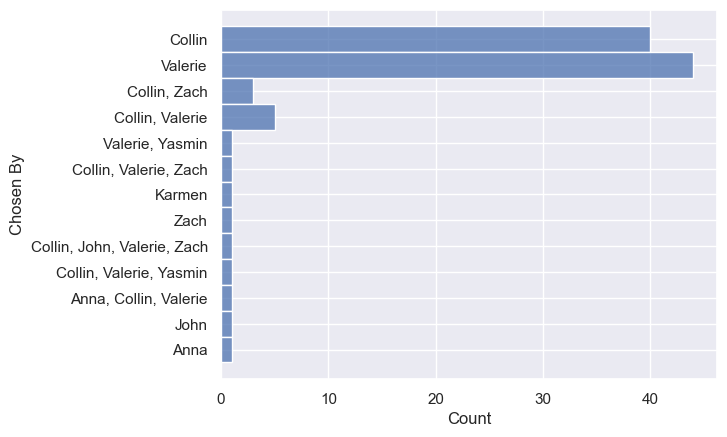

In [57]:
# # Histogram of picks per person
sns.set_theme(style="darkgrid")
sns.histplot(data = movie_list_real, y= movie_list_real["Chosen By"])


<Axes: xlabel='Chosen By', ylabel='Collin Rating'>

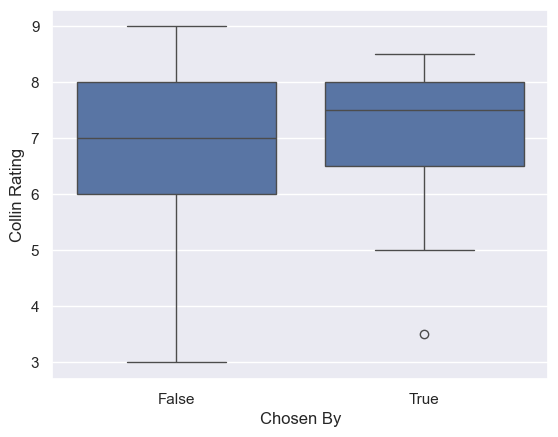

In [58]:

# # Box Plot of ratings
sns.boxplot( x = movie_list_real["Chosen By"]=='Collin', y=c_rating)


In [59]:
# valerie movie picks

v_picks = movie_list_real["Chosen By"]== "Valerie"
v_sum=v_picks.value_counts()


v_rating = movie_list_real["Valerie Rating"]
v_avg= v_rating.mean()
v_avg

v_max= v_rating.max()

v_min = v_rating.min()
v_min

stdvv= v_rating.std()
stdvv


np.float64(1.565658688448051)

C:\Users\19564\AppData\Local\Temp\ipykernel_19116\2198334217.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels = movie_list_real["Completed"] , rotation=90)


[Text(0, 0, 'October 6, 2024'),
 Text(1, 0, 'October 6, 2024'),
 Text(2, 0, 'September 30, 2024'),
 Text(3, 0, 'September 29, 2024'),
 Text(4, 0, 'September 26, 2024'),
 Text(5, 0, 'September 25, 2024'),
 Text(6, 0, 'September 22, 2024'),
 Text(7, 0, 'September 21, 2024'),
 Text(8, 0, 'September 18, 2024'),
 Text(9, 0, 'September 16, 2024'),
 Text(10, 0, 'September 15, 2024'),
 Text(11, 0, 'September 9, 2024')]

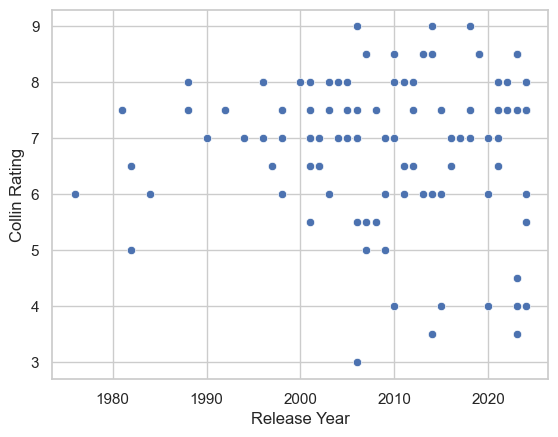

In [94]:
# # scatter plot?

 
sns.set(style='whitegrid') 
sns.scatterplot(x=movie_list_real["Release Year"],
                    y=c_rating,
                    data=movie_list_real)
g.set_xticklabels(labels = movie_list_real["Completed"] , rotation=90) 
# movie_list_real

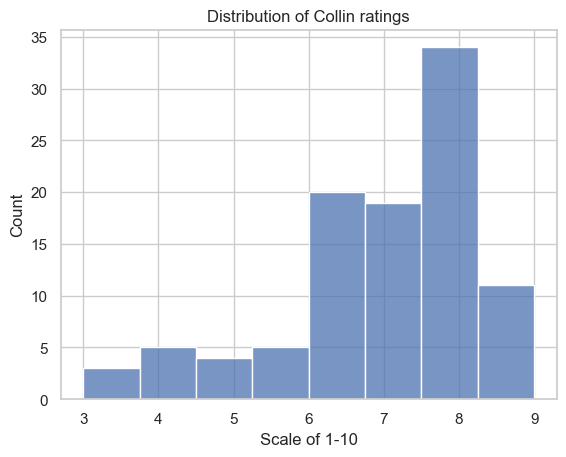

In [63]:
# Collin rating histogram
sns.histplot(data=movie_list_real, x=c_rating)
plt.title('Distribution of Collin ratings')
plt.xlabel('Scale of 1-10')
plt.ylabel('Count')
plt.grid(True)
plt.show()

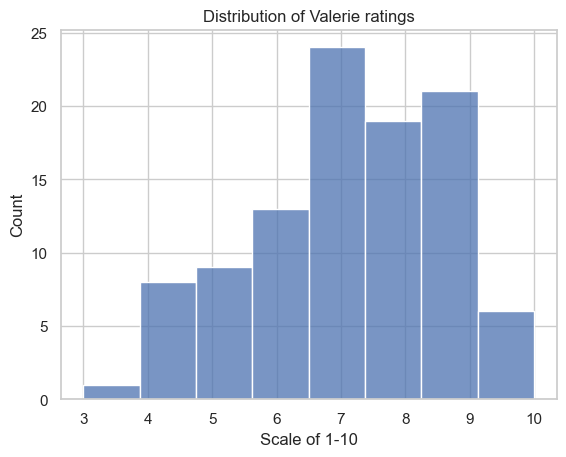

In [101]:
# Valerie rating histogram
sns.histplot(data=movie_list_real, x=v_rating)
plt.title('Distribution of Valerie ratings')
plt.xlabel('Scale of 1-10')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [151]:
#  mean rating per genre
# movie_list_real["genre_mean"] = movie_list_real.groupby("Genre")["Collin Rating"].transform(lambda x: x.mean())
# print(movie_list_real[["Genre","genre_mean"]].value_counts(ascending=False))


movie_list_real


# seperate genre categories TODO
movie_list_real["Genre"].value_counts()

movie_genre = (movie_list_real["Genre"])
list = []

for val in movie_genre:
    if val not in list:
        list.append(val)

movie_genre



TypeError: '<' not supported between instances of 'float' and 'str'